# Applications EDA

## Fields description

`app_id` is the unique identificator of an application. One customer could have many applications and not every application results in a loan.

`profile_id` is the unique identificator of a customer. One customer could have many loans.

`business_key` is the unique identificator of a process (same as an application in this context).

`start_time` time when an application was started.

`end_time` time when an application was finished by a client.

`know_source` tells where client got information about the lending company.

`app_status_code` is final status of an application. Possible values are: **REJECT**, **LOAN** and **CCANCEL** (a client decided not to take a loan after company's positive verdict)

`social_status` show whether a client has any social status.

`education` is the level of a customer's education. possible values are: **USCH** - unfinished school, **SCH** - school, **SSCH** - specialized school, **UHIGH** - unfinished university, **HIGH** - university, **DEGREE** - phd or higher.

`faculty` is what faculty did client grauted from.

`credit_term` is the initial term in days of a loan the client has asked for.

`credit_amount` is the initial amount of a loan the client has asked for.

`loan_purpose` is the purpose a client wants to take a loan for.

`email` is client's email address.

`liv_equal` whether client's living address and address of registration are equal.

Prefixes are **reg** for an address of registration, **liv** for a living address and **emp** for an address of employment.

`*_region` the code of a region (Ukraine)

`*_addr_date` is the date from which a client has started to live / being registered / working at an address.

`*_latitude`, `*_longitude` are geolocation of an address.

`*_status` determines the ownership of a client for an address. 

`birthday` is client's date of birth.

`gender` is client's gender.

`exp_loans` are declared by client monthly expenditures to repay other loans.

`exp_all` are declared by customers monthly expenditures excluding repayments of othen loans.

`income` is client's monthly income.

`income_next` is the date of the next income.

`income_period` shows how often a client recieves income.

`income_source` is the source of income in case client is **UNEMPLOYED**.

`emp_begin` is the start date of current client's employment.

`emp_field` is the field of economy of current client's employment.

`emp_position` is the current client's position.

`emp_first` is whether current employemnt is client's first employemnt.

`emp_type` is the client's employment type.

`cp_relation` is the type of relationship between client and contact person.

`family_status` is client's family status.

`children16` is how many childen under the age of 16 client has.

`passport_date` is the date when client's passport was issued.

`passport_type` is the kind client's passport type. Possible values are **PASSPORT** or **IDCARD**.

`mphone_code` is operator's code of client's cell phone.

`reg_phone_code` is operator's code of client's phone at address of registration.

`liv_phone_code` is operator's code of client's living address.

`emp_phone_code` is operator's code at client's employment.

`cp_phone_code`  is operator's code of client's contact person.

`has_reg_pcode` is whether postal code for the registration address was provided.

`has_liv_pcode` is whether postal code for the living address was provided.

`has_emp_pcode` is whether postal code for the address of employment was provided.

`has_reg_flat` is whether flat number code for the registration address was provided.

`has_liv_flat` is whether flat number code for the living address was provided.

`has_emp_flat` is whether flat number code for the address of employment was provided.

`has_emp_edrpou` is whether client's employment company tax code was provided.

`has_promo_code` is whether promo code was used with the current client's application for a loan.

## Additional notes from the owners of the dataset

1. Nearly all fields are provided by clients and were not verified at all.

2. At different stages of project development some checks were missing so in a lot of situations client where allowed to enter bullshit info in some field.

3. In most cases when information looks like a garbage it was due to cient's mistake as a result of entering information from smartfone and being inattentive.

## Load data

In [1]:
# load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import re

In [2]:
# load data

df_apps = pd.read_csv('../data/raw/dr_applications_full.csv')
display(df_apps.head())

df_loans = pd.read_csv('../data/interim/int_loans.csv')
display(df_loans.head())

,app_id,profile_id,business_key,start_time,end_time,app_status_code,credit_term,credit_amount,know_source,loan_purpose,...,emp_phone_code,cp_phone_code,has_reg_pcode,has_liv_pcode,has_emp_pcode,has_reg_flat,has_liv_flat,has_emp_flat,has_emp_edrpou,has_promo_code
0,4281,4138,693ae24c-c72e-459d-969d-2b7bb850c692,2018-06-02 08:46:55.742,2018-06-02 09:57:07.067,REJECT,16,900.0,FRIENDS,CELEBRATION,...,066,095,True,True,True,False,True,True,False,False
1,4406,1928,ae983d8c-bc0a-4e38-b6d4-bef4d3e178b2,2018-06-03 09:48:01.617,2018-06-03 10:02:36.445,REJECT,28,2000.0,SEARCH,REPAIR,...,ne,068,True,True,False,True,True,False,False,False
2,4511,5328,5683bae4-b2fb-4b08-a105-7bad4b7a0f06,2018-06-03 19:38:10.077,2018-06-04 08:06:20.067,REJECT,28,2000.0,BANNER,REPAIR,...,098,098,True,True,True,False,False,False,False,False
3,4654,5527,11f7443a-fb48-4844-ba39-8d5bb99fd2c4,2018-06-05 17:07:20.327,2018-06-08 17:08:11.114,LOAN,26,2000.0,SEARCH,BIGP,...,ne,096,False,False,True,False,False,False,False,False
4,4705,5580,9a879db4-3a5d-475c-a65c-393c3d6aa1dd,2018-06-06 16:07:37.114,2018-06-06 16:26:25.073,REJECT,28,2000.0,BANNER,REPAIR,...,056,068,True,True,True,True,True,False,False,False


,profile_id,app_id,loan,begin_date,end_date,amount,product,status,lodging_cnt,repayment_ratio,loan_num,can_be_bad,bad
0,709513,509688,21025,2019-06-14,2019-06-28,700.0,START_11,CLOSED,0,1.000,1,True,False
1,690248,518539,21232,2019-06-19,2019-06-30,2000.0,START_11,CLOSED,0,1.054,3,True,False
2,753344,755195,30938,2019-11-23,2019-12-07,700.0,START_11,CLOSED,0,1.036,17,True,False
3,416384,393817,17844,2019-04-09,2019-05-04,2300.0,START_11,CLOSED,1,1.180,2,True,False
4,767257,580393,23343,2019-07-31,2019-08-07,3000.0,START_11,CLOSED,0,1.108,2,True,False


In [3]:
# convert 'begin_date' and 'end_date' fields to datetime type
df_loans.loc[:,['begin_date', 'end_date']] = df_loans[['begin_date', 'end_date']].transform(pd.to_datetime)

In [4]:
# ========== !!! AHTUNG !!! Can take up to 10 minutes to calculate ============== 
# (Йобаний пітон, R це рахує менше хвилини ;( )

# Calculate application rank for each loan
df_apps = df_apps.sort_values('start_time').groupby('profile_id').apply(
    lambda df: df.assign(app_rank = lambda x: (~ x['app_status_code'].apply(lambda r: True if r == 'LOAN' else np.NaN).shift(1).isnull()).cumsum() + 1)
).reset_index(drop=True)

# Profile ID to test 210648

In [5]:
# Count how many applications were made before loan
df_apps = pd.merge(
    left = df_apps,
    right = (df_apps
             .groupby(['profile_id','app_rank'])
             .agg(app_count=pd.NamedAgg(column='app_id', aggfunc='count'))
             .assign(app_status_code='LOAN')
            ),
    how='left',
    on=['profile_id', 'app_rank', 'app_status_code']
)

In [6]:
# Filter only apps which lead to loans
df_apps = df_apps[df_apps['app_status_code'] == 'LOAN']
df_apps.head()

,app_id,profile_id,business_key,start_time,end_time,app_status_code,credit_term,credit_amount,know_source,loan_purpose,...,has_reg_pcode,has_liv_pcode,has_emp_pcode,has_reg_flat,has_liv_flat,has_emp_flat,has_emp_edrpou,has_promo_code,app_rank,app_count
1,23542,14,2faadfd1-e453-48e2-9477-783088d0bcef,2018-07-22 10:36:48.200,2018-07-22 10:47:20.014,LOAN,28,300.0,SEARCH,HEALTH,...,True,True,False,True,True,False,False,False,1,2.0
3,71871,14,beb8cb77-a8c7-4973-94cb-9e5ad79bda7a,2018-10-19 12:22:19.711,2018-10-19 12:34:19.849,LOAN,28,300.0,BOARD,DEBT,...,True,True,False,True,True,False,False,False,2,2.0
5,243894,14,ad20cabe-f872-4454-b256-cc8478e41369,2019-02-13 17:59:46.609,2019-02-13 18:28:47.077,LOAN,28,300.0,PRESS,CELEBRATION,...,False,False,False,True,True,False,False,False,3,2.0
9,10421,30,51a8f418-0347-4fbf-b887-1167d812f0a9,2018-06-23 11:59:03.310,2018-06-23 12:13:46.713,LOAN,5,300.0,SEARCH,SMALLP,...,True,False,False,True,True,True,True,False,1,2.0
10,65237,30,b6a46aec-dbef-4276-bad7-f34420a28fdf,2018-09-28 15:18:41.350,2018-09-28 15:31:15.718,LOAN,7,300.0,SEARCH,SMALLP,...,True,True,False,False,False,False,False,False,2,1.0


In [7]:
# convert 'created_at' and 'updated_at' fields to datetime type
datetime_fields = [
    'start_time','end_time','reg_addr_date','liv_addr_date','birthday',
    'income_next','emp_begin','passport_date'
]
df_apps.loc[:,datetime_fields] = df_apps[datetime_fields].transform(pd.to_datetime, errors='coerce')

# Convert mobile phone code to string
df_apps['mphone_code'] = '0' + df_apps['mphone_code'].astype(str)

# Convert to NaN's missing pheone codes for living, registration and employment addresses
df_apps['liv_phone_code'].replace({'ne': np.NaN}, inplace=True)
df_apps['reg_phone_code'].replace({'ne': np.NaN}, inplace=True)
df_apps['emp_phone_code'].replace({'ne': np.NaN}, inplace=True)
df_apps['cp_phone_code'].replace({'ne': np.NaN}, inplace=True)

df_apps.head()

,app_id,profile_id,business_key,start_time,end_time,app_status_code,credit_term,credit_amount,know_source,loan_purpose,...,has_reg_pcode,has_liv_pcode,has_emp_pcode,has_reg_flat,has_liv_flat,has_emp_flat,has_emp_edrpou,has_promo_code,app_rank,app_count
1,23542,14,2faadfd1-e453-48e2-9477-783088d0bcef,2018-07-22 10:36:48.200,2018-07-22 10:47:20.014,LOAN,28,300.0,SEARCH,HEALTH,...,True,True,False,True,True,False,False,False,1,2.0
3,71871,14,beb8cb77-a8c7-4973-94cb-9e5ad79bda7a,2018-10-19 12:22:19.711,2018-10-19 12:34:19.849,LOAN,28,300.0,BOARD,DEBT,...,True,True,False,True,True,False,False,False,2,2.0
5,243894,14,ad20cabe-f872-4454-b256-cc8478e41369,2019-02-13 17:59:46.609,2019-02-13 18:28:47.077,LOAN,28,300.0,PRESS,CELEBRATION,...,False,False,False,True,True,False,False,False,3,2.0
9,10421,30,51a8f418-0347-4fbf-b887-1167d812f0a9,2018-06-23 11:59:03.310,2018-06-23 12:13:46.713,LOAN,5,300.0,SEARCH,SMALLP,...,True,False,False,True,True,True,True,False,1,2.0
10,65237,30,b6a46aec-dbef-4276-bad7-f34420a28fdf,2018-09-28 15:18:41.350,2018-09-28 15:31:15.718,LOAN,7,300.0,SEARCH,SMALLP,...,True,True,False,False,False,False,False,False,2,1.0


## Basic overview

In [8]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13552 entries, 1 to 153771
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   app_id           13552 non-null  int64         
 1   profile_id       13552 non-null  int64         
 2   business_key     13552 non-null  object        
 3   start_time       13552 non-null  datetime64[ns]
 4   end_time         13552 non-null  datetime64[ns]
 5   app_status_code  13552 non-null  object        
 6   credit_term      13552 non-null  int64         
 7   credit_amount    13552 non-null  float64       
 8   know_source      13552 non-null  object        
 9   loan_purpose     13552 non-null  object        
 10  social_status    13552 non-null  object        
 11  family_status    13552 non-null  object        
 12  children16       13552 non-null  int64         
 13  education        13552 non-null  object        
 14  faculty          10989 non-null  obje

In [9]:
df_apps.drop(['profile_id', 'app_id'], axis='columns').describe()

,credit_term,credit_amount,children16,reg_latitude,reg_longitude,liv_latitude,liv_longitude,emp_first,exp_loans,exp_all,income,app_rank,app_count
count,13552.000000,13552.000000,13552.000000,9899.000000,9899.000000,9919.000000,9919.000000,4470.000000,13491.000000,13552.000000,13552.000000,13552.000000,13552.000000
mean,21.213991,2196.022727,0.589433,49.244382,30.999761,49.307809,30.895435,0.627964,1915.101401,6357.460744,14202.451004,1.721148,1.677760
std,7.739702,1136.096278,1.265961,1.329054,4.009880,1.329966,3.843688,0.483402,2840.616791,6062.474783,12259.624789,1.457316,2.930149
min,1.000000,100.000000,0.000000,45.303432,22.207221,45.303432,22.207221,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,14.000000,1400.000000,0.000000,48.427156,28.528397,48.464740,28.663771,0.000000,500.000000,3000.000000,8550.000000,1.000000,1.000000
50%,25.000000,2000.000000,0.000000,49.460232,30.707839,49.747899,30.635396,1.000000,1000.000000,5000.000000,12000.000000,1.000000,1.000000
75%,28.000000,3000.000000,1.000000,50.399437,34.374330,50.424020,33.831443,1.000000,2500.000000,8000.000000,15000.000000,2.000000,1.000000
max,28.000000,4000.000000,30.000000,52.327625,39.816337,52.327625,39.816337,1.000000,60000.000000,140000.000000,300000.000000,23.000000,165.000000


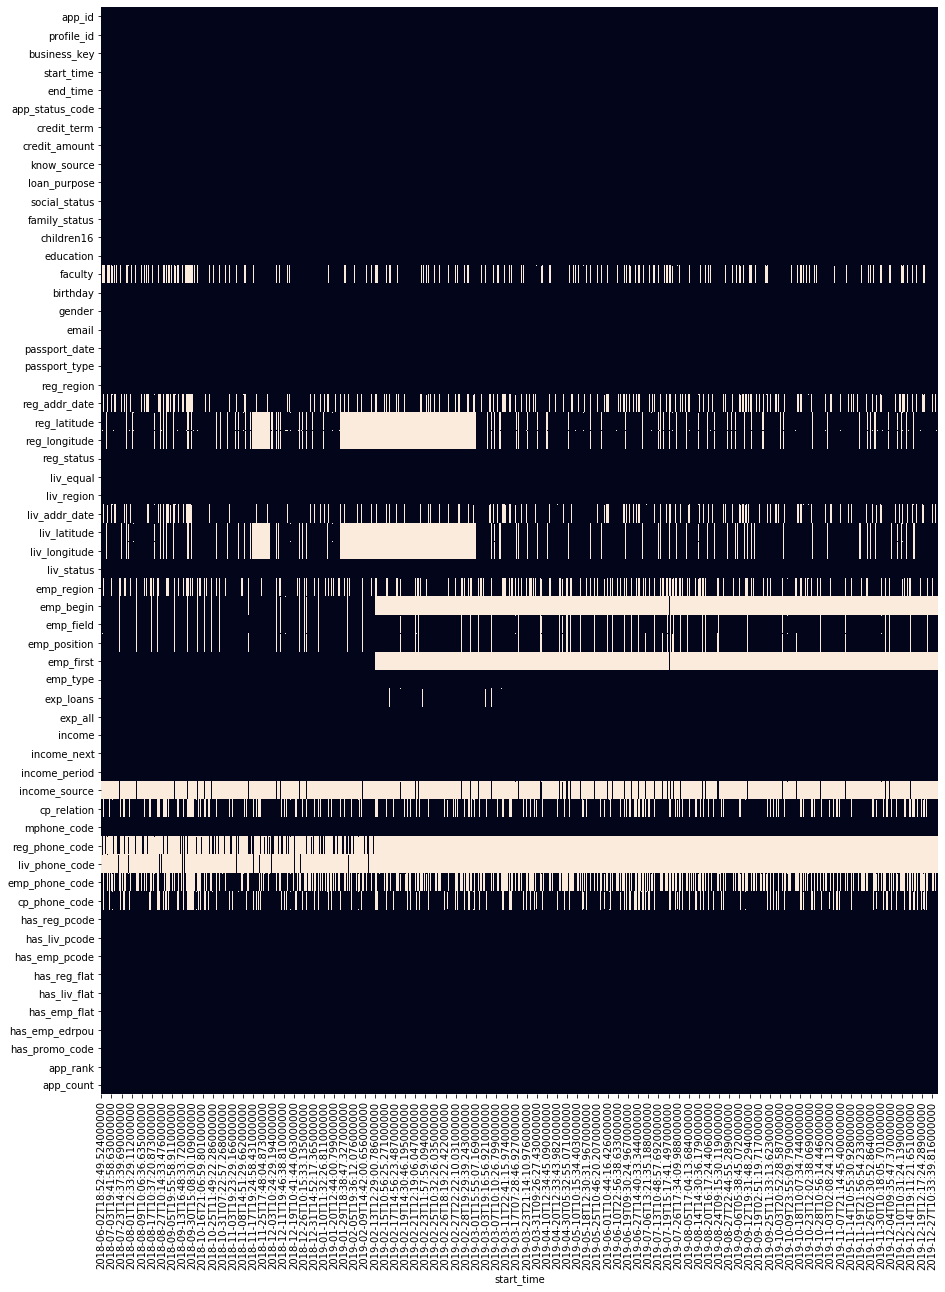

In [10]:
# plot heatmap with missing values
plt.figure(figsize=(15,20))
sns.heatmap(df_apps.set_index('start_time', drop=False).sort_index().isnull().T, cbar=False)
plt.show()

Some fields where not collected for the long period of time and can be dropped cause are not available for current analysis. 

Such fields are:

- `emp_begin` cause the company stopped to collect the field long time ago;
- `emp_first` cause the company stopped to collect the field long time ago;
- `liv_phone_code` cause the company stopped to collect the field long time ago;
- `reg_phone_code`  cause the company stopped to collect the field long time ago;
- `app_status_code` same value for all loans.

In [11]:
# Drop useless columns with missing data
df_apps.drop(
    ['emp_begin','emp_first','liv_phone_code','reg_phone_code','app_status_code'], 
    axis='columns', 
    inplace=True
)

In [12]:
cat_vars = {
    'know_source': 'Information Source',
    'social_status': 'Social Status',
    'education': 'Education',
    'loan_purpose': 'Loan Purpose',
    'reg_status': 'Reg Address Status',
    'liv_equal': 'Reg and Liv Addr are equal',
    'liv_status': 'Graph title',
    'gender': 'Gender',
    'income_period': 'Income period',
    'income_source': 'Income Source',
    'emp_field': 'Emp field',
    'emp_type': 'Emp type',
    'cp_relation': 'Contact Person',
    'family_status': 'Family Status',
    'faculty': 'Faculty',
    'passport_type': 'Passport',
    'mphone_code': 'Mobile phone',
    'emp_phone_code': 'Emp phone',
    'cp_phone_code': 'cp_phone_code',
    'has_reg_pcode': 'has_reg_pcode',
    'has_liv_pcode': 'has_liv_pcode',
    'has_emp_pcode': 'has_emp_pcode',
    'has_reg_flat': 'has_reg_flat',
    'has_liv_flat': 'has_liv_flat',
    'has_emp_flat': 'has_emp_flat',
    'has_emp_edrpou': 'has_emp_edrpou',
    'has_promo_code':  'has_promo_code'
}

In [13]:
# Merge loans and applications data
df_data = pd.merge(
    left=df_loans,
    right=df_apps,
    how='inner',
    on='app_id'
)

In [14]:
def get_colors(br):
    colors = ['#4CAF50', '#8BC34A', '#CDDC39', '#FFEB3B', '#FFC107', '#FF9800', '#FF5722']
    splits = np.array([0.2, 0.22, 0.24, 0.26, 0.28, 0.3])
    return [colors[sum(x >= splits)] for x in br]


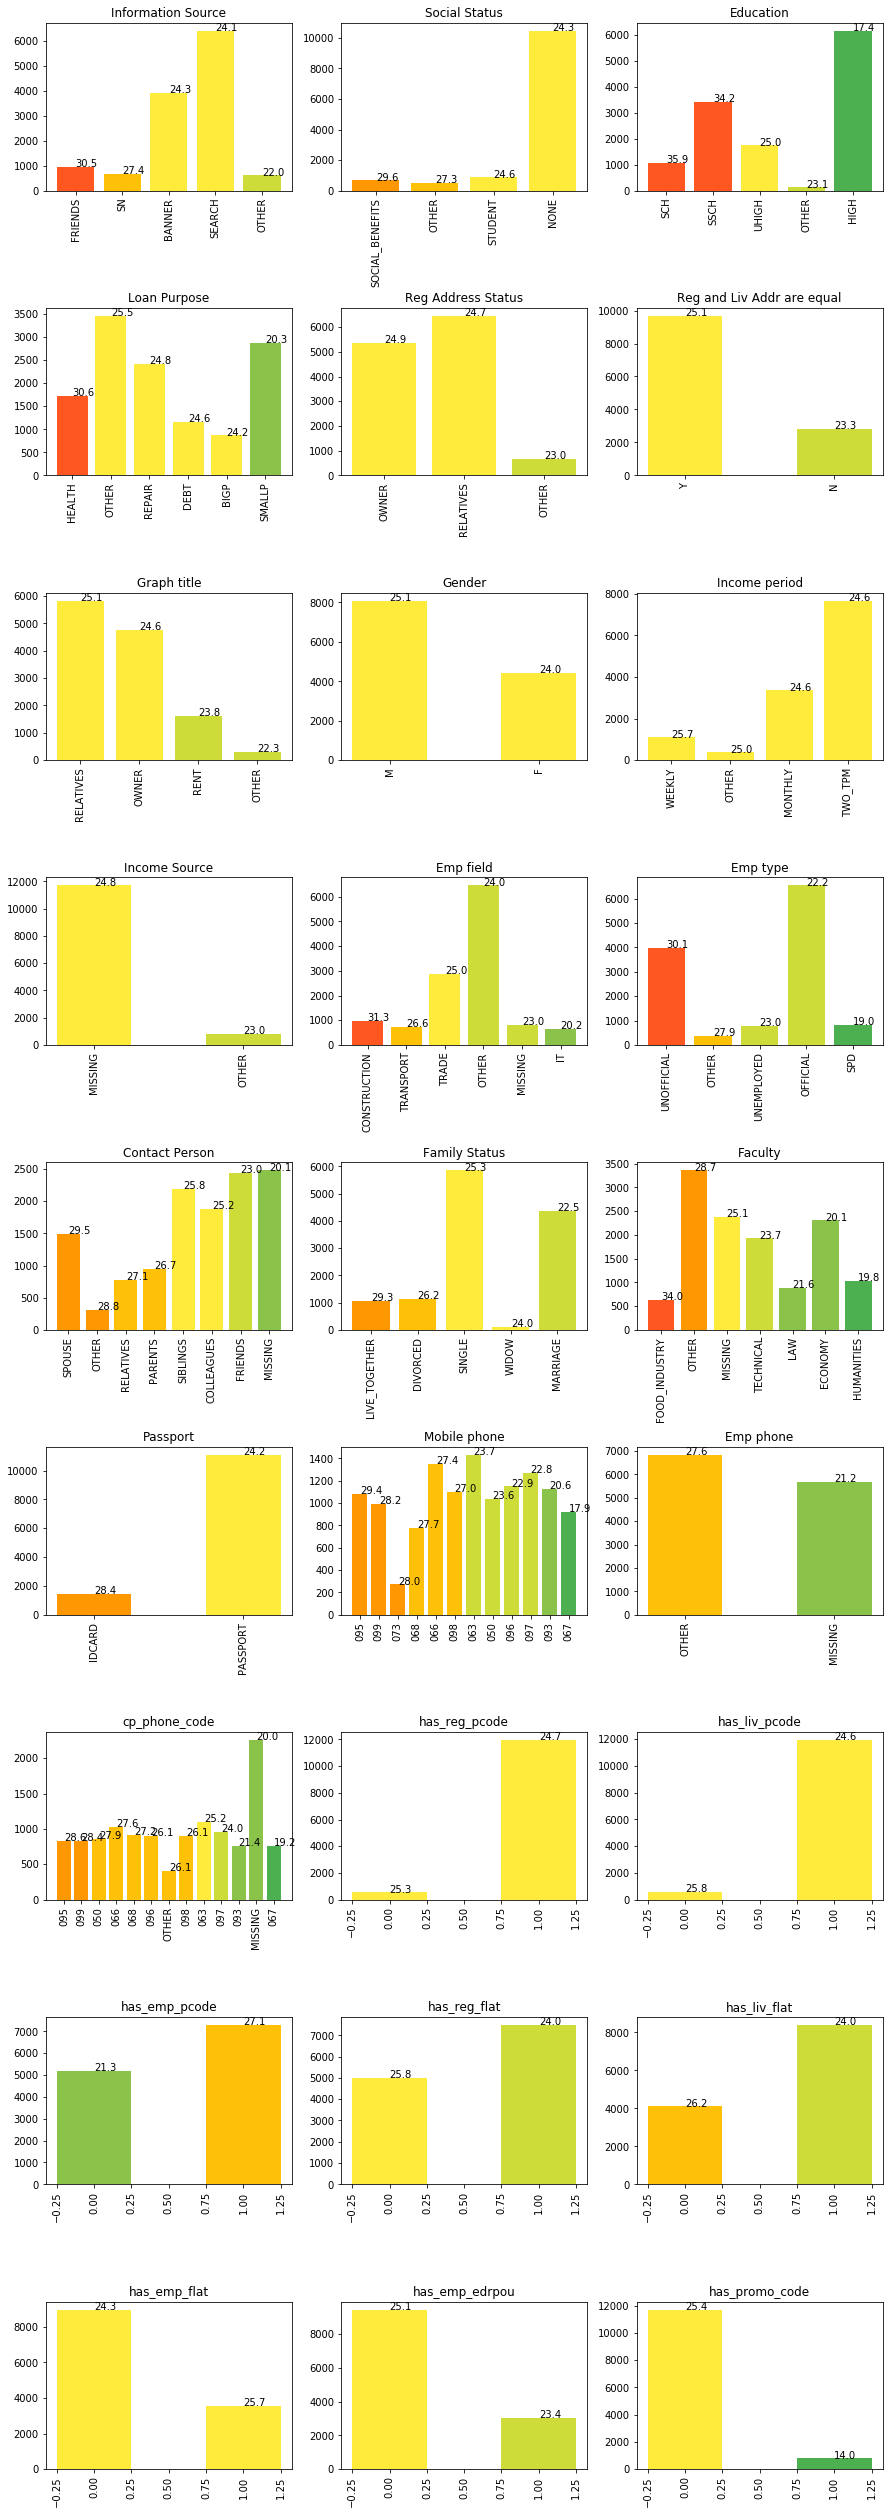

In [15]:
# Inspect categorical variables

fig_rows = len(cat_vars)//3 + (len(cat_vars)%3 > 0)

plt.subplots(fig_rows, 3, figsize=(15, fig_rows*5))
plt.subplots_adjust(hspace=0.7)

row = 1 
for var, title in cat_vars.items():
    # trasform data
    var = df_data[[var,'bad']].rename(columns={var: 'variable'})
    var['variable'].fillna('MISSING', inplace=True)
    cats = var['variable'].value_counts(normalize=True)
    other_cats = cats[cats < 0.05].index
    if len(other_cats) > 1:
        var['variable'] = var['variable'].apply(lambda x: 'OTHER' if x in other_cats else x)
    var = var.groupby('variable').agg(
        count = pd.NamedAgg('variable', 'count'), 
        br = pd.NamedAgg('bad', 'mean')
    ).sort_values('br', ascending=False)

    # produce plot
    plt.subplot(fig_rows, 3, row)
    plt.bar(var.index, var['count'], width=(0.5 if var.shape[0] == 2 else 0.8), color=get_colors(var['br']))
    for r in var.index:
        plt.text(r, var.loc[r,'count'], round(var.loc[r,'br']*100,1))
    plt.xticks(rotation=90)
    plt.title(title)
    
    # proceed to next plot
    row += 1

plt.show()

Some fields looks like good predictors but there are possibly useless. 

Prominet fields are:

- `education`;
- `loan_purpose`;
- `emp_type`;
- `family_status`;
- `faculty`;
- `cp_relation`;
- `emp_phone_code`;
- `has_emp_pcode`;
- `has_emp_edrpou`.

In [16]:
cont_vars = {
    'credit_term': 'credit_term',
    'credit_amount': 'credit_amount',
    'exp_loans': 'exp_loans',
    'exp_all': 'exp_all',
    'income': 'income',
    'children16': 'children16',
    'app_rank': 'app_rank',
    'app_count': 'app_count'
}

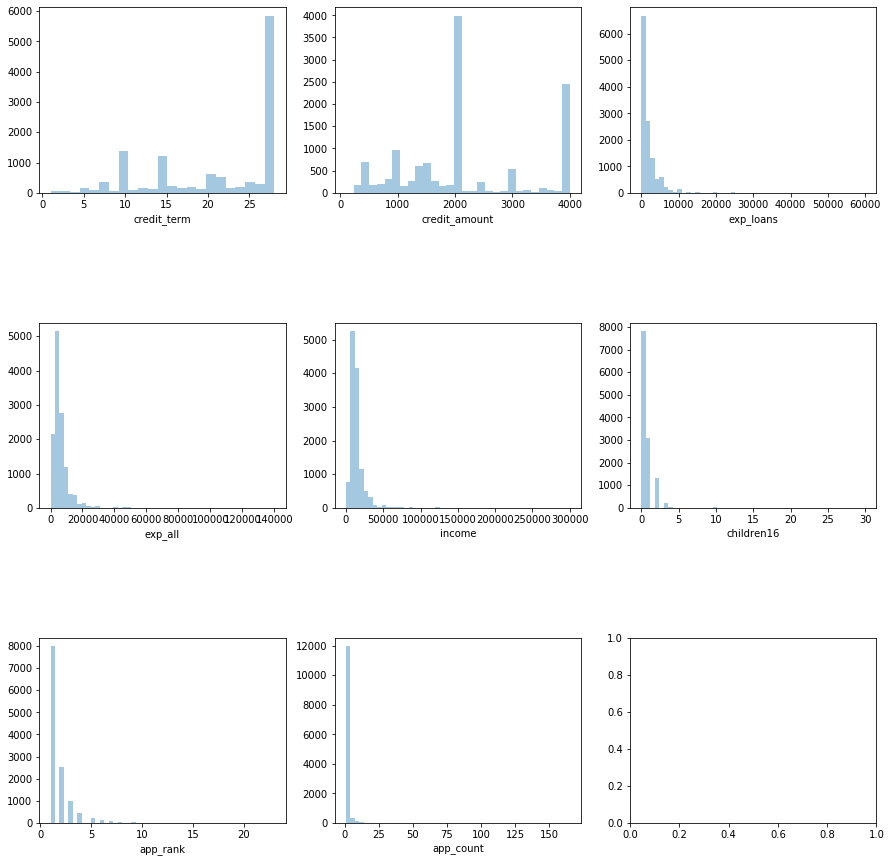

In [17]:
fig_rows = len(cont_vars)//3 + (len(cont_vars)%3 > 0)

fig, ax = plt.subplots(fig_rows, 3, figsize=(15, fig_rows*5))
plt.subplots_adjust(hspace=0.7)

row, col = 0, 0 
for var, title in cont_vars.items():

    # produce plot
    sns.distplot(df_data[var], kde=False, ax=ax[row, col]) # .set_title(title)
    
    # proceed to next plot
    if col < 2:
        col += 1
    else:
        col = 0
        row += 1

plt.show()

It's clear that the folowing graphs has outliers:

- `exp_loans`
- `exp_all`
- `income`
- `children16`

Also there some strange client who has way more apps and loans than an average client.

In [18]:
date_vars = {
    'reg_addr_date': 'reg_addr_date',
    'liv_addr_date': 'liv_addr_date',
    'birthday': 'birthday',
    'income_next': 'income_next',
    'passport_date': 'passport_date'
}

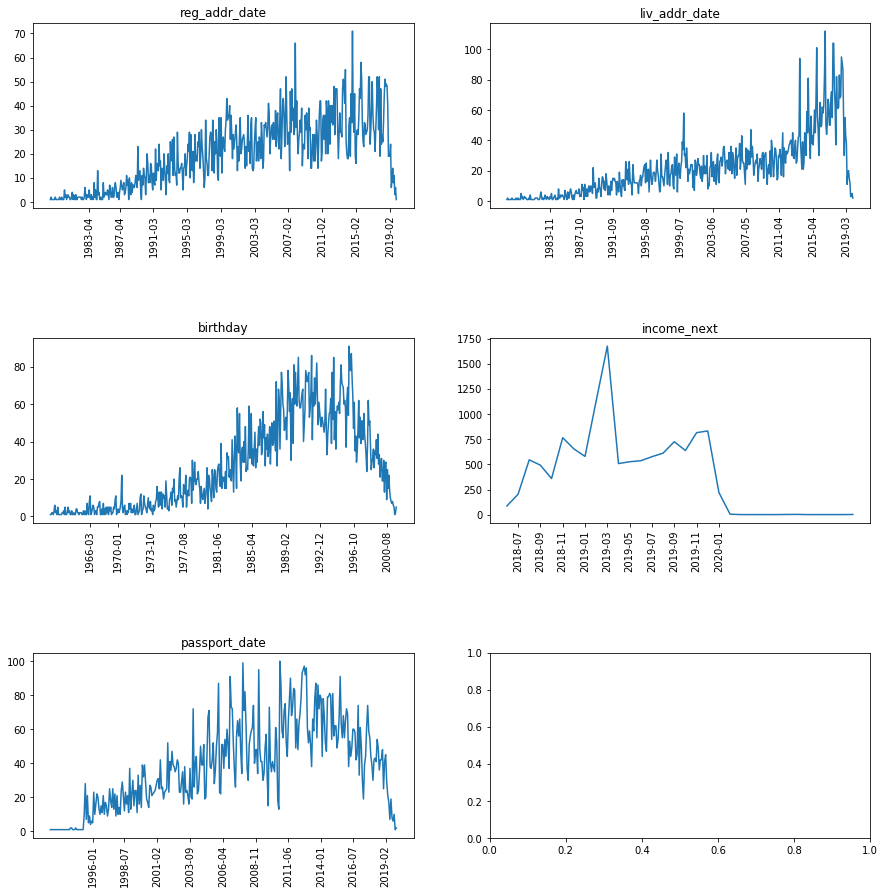

In [19]:
# Inspect date variables

fig_rows = len(date_vars)//2 + (len(date_vars)%2 > 0)

plt.subplots(fig_rows, 2, figsize=(15, fig_rows*5))
plt.subplots_adjust(hspace=0.7)

row = 1 
for var, title in date_vars.items():
    # trasform data
    var = df_data[[var]].rename(columns={var: 'variable'})
    var_xticks = pd.date_range(var['variable'].quantile(0.01), var['variable'].quantile(0.99), 10).strftime('%Y-%m')
    var['month'] = var['variable'].dt.strftime('%Y-%m')
    var = var.groupby('month').agg(count = pd.NamedAgg('variable', 'count')).sort_values('month')

    # produce plot
    plt.subplot(fig_rows, 2, row)
    plt.plot(var.index, var['count'])
    plt.xticks(ticks=var_xticks, rotation=90)
    plt.title(title)
    
    # proceed to next plot
    row += 1

plt.show()

Date variables can't be used dirrectly and should be converted to age-like variables:
These variables also contain outliers.

These variables should be transformed or converted during feature engineering.

## Feature engineering

In [20]:
# test for the same region of registration and employment
df_apps['emp_region_equal'] = (df_apps['emp_region'] == df_apps['reg_region'])

In [21]:
# get age's
report_date = pd.to_datetime('2020-04-16')

df_apps['age'] = df_apps['birthday'].apply(lambda x: (report_date - x).days)
df_apps['passport_age'] = df_apps['passport_date'].apply(lambda x: (report_date - x).days)
df_apps['reg_addr_age'] = df_apps['reg_addr_date'].apply(lambda x: (report_date - x).days)
df_apps['liv_addr_age'] = df_apps['liv_addr_date'].apply(lambda x: (report_date - x).days)
df_apps['days_to_income'] = df_apps.apply(lambda r: (r['income_next']-r['start_time']).days, axis='columns')

In [22]:
df_apps.drop(
    ['birthday', 'reg_addr_date', 'liv_addr_date', 'income_next', 'passport_date'], 
    axis='columns',
    inplace=True
)

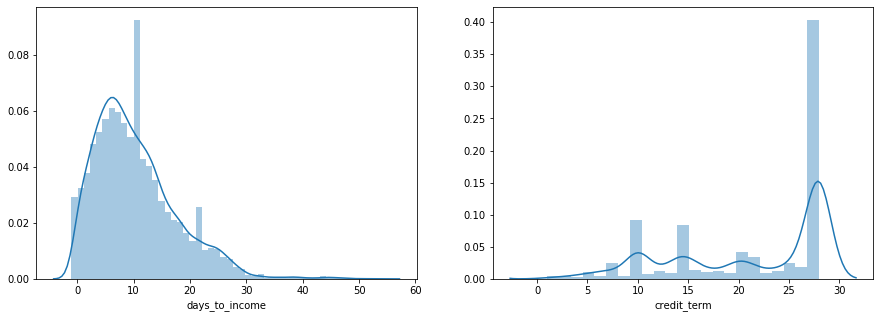

In [23]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.distplot(df_apps[df_apps['days_to_income']<60]['days_to_income'], ax=ax[0])
sns.distplot(df_apps['credit_term'], ax=ax[1])
plt.show()

Clients states that they will recieve next income on average in 7-14 days but they ask for a maximum term (28 days) loan.

In [24]:
# Application date and time
df_apps['start_month'] = df_apps['start_time'].dt.month
df_apps['start_day'] = df_apps['start_time'].dt.day
df_apps['start_day_of_week'] = df_apps['start_time'].dt.weekday
df_apps['start_hour'] = df_apps['start_time'].dt.hour
df_apps['duration'] = (df_apps['end_time']-df_apps['start_time']).dt.seconds

In [25]:
# elaborate emails
df_apps['email'] = df_apps['email'].str.lower()

df_apps['prefix'] = df_apps['email'].apply(lambda x: x.split('@')[0])
df_apps['domain'] = df_apps['email'].apply(lambda x: x.split('@')[1])

df_apps['email_prefix_length'] = df_apps['prefix'].apply(lambda x: len(x))
df_apps['email_prefix_digits'] = df_apps['prefix'].apply(lambda x: sum([c.isdigit() for c in x]))
df_apps['email_prefix_letters'] = df_apps['prefix'].apply(lambda x: sum([c.isalpha() for c in x]))
df_apps['email_prefix_symbols'] = df_apps['email_prefix_length']-df_apps['email_prefix_digits']-df_apps['email_prefix_letters']

def get_domain_zone(x):
    dz = re.findall(r'[a-z]{2,}$', x)
    return dz[0] if len(dz) else 'None'

df_apps['domain_zone'] = df_apps['domain'].apply(get_domain_zone)

# drop fields
df_apps.drop(['email', 'prefix'], axis='columns', inplace=True)

In [26]:
# Transform position at the paca of employment
# df_apps['emp_position'] = df_apps['emp_position'].str.lower()

def position_group(x):
    if pd.isnull(x):
        return x
    elif (x.find('менедж') >= 0) or (x.find('менеж') >= 0):
        return 'менеджер'
    elif (x.find('директор') >= 0) or (x.find('діректор') >= 0):
        return 'директор'
    elif x.find('продав') >= 0:
        return 'продавець'
    elif (x.find('керівник') >= 0) or (x.find('руков') >= 0) or (x.find('начал') >= 0):
        return 'керівник'
    elif (x.find('воді') >= 0) or (x.find('такс') >= 0) or (x == 'водитель'):
        return 'водій'
    elif (x.find('власник') >= 0) or (x == 'собственник'):
        return 'власник'
    elif (x.find('оператор') >= 0):
        return 'оператор'
    elif (x.find('спеці') >= 0) or (x.find('специ') >= 0):
        return 'спеціаліст'
    elif (x.find('охорон') >= 0) or (x.find('охран') >= 0) or (x.find('комірник') >= 0):
        return 'охоронець/комірник'
    elif (x.find('каси') >= 0) or (x.find('касі') >= 0) or (x.find('касс') >= 0):
        return 'касир'
    elif (x.find('бухгал') >= 0) or (x.find('бугал') >= 0):
        return 'бухгалтер'
    elif (x.find('майстер') >= 0) or (x.find('мастер') >= 0) or (x.find('робочий') >= 0) or (x.find('робітник') >= 0):
        return 'майстер/робітник'
    elif (x.find('вчител') >= 0) or (x.find('учител') >= 0):
        return 'вчитель'
    else:
        return 'інше'

df_apps['emp_position'] = df_apps['emp_position'].apply(position_group)

In [27]:
# income and expenditures
df_apps['exp_all_to_income'] = df_apps['exp_all'] / df_apps['income']
df_apps['exp_loans_to_income'] = df_apps['exp_loans'] / df_apps['income']

In [28]:
# unemployed and income source
df_apps['income_source'] = df_apps.apply(lambda r: r['income_source'] if r['emp_type'] == 'UNEMPLOYED' else r['emp_type'], axis='columns')

df_apps.drop('emp_type', axis='columns', inplace=True)

<u>Thoughts</u>

Looks like it's better to investigate further who are those clients with repayments ratio from 10% to 60%.

## Export Data for Preprocessing

In [29]:
df_apps.to_csv('../data/interim/int_applications.csv', index=False)